# Testing Models of Attention

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from utils import *
np.random.seed(2020)

In [2]:
# model a neuron with pRF at ecc 2, size 1
pRF = pRF_model(420,300,60,plot=False)
bold = predict_BOLD(pRF, plot=False)

## Testing Gaussian Interaction Model
Gaussian interaction models are used to predict this re-weighting of stimulus-driven pRFs in response to an attention field (Klien et al., 2014). Below I simulate normal distributions to test the effects of attention by implementing a gaussian interaction model (Klien et al., 2014; Klien et al., 2018).

In [43]:
def gauss_interaction(muPRF, sigPRF, muAF,sigAF):
    
    muAF_pRF = ((muAF*sigPRF**2) + (muPRF*sigAF**2))/(sigAF**2+sigPRF**2)
    sigAF_pRF = np.sqrt(sigAF**2 * sigPRF**2)/(sigAF**2 + sigPRF**2)
    sig2 = (sigAF**2)/((sigAF**2/sigPRF**2)-1)
    
    return muAF_pRF,sigAF_pRF

def get_AF(muprf,sigprf,muafprf,sigafprf):
    sigaf=np.sqrt((sigafprf**2) * (sigprf**2)) / ((sigprf**2) - (sigafprf**2))
                                                                                                                                             
    muAF= (muafprf*(sigaf**2 + sigprf**2)-(muprf*sigaf**2))/sigprf**2
    return muAF,sigaf

In [56]:
get_AF(0,2,*gauss_interaction(2,1.4,0,2))

(1.3630237064385526, 0.24861746758199849)

pRF Centre: 5, pRF size: 2


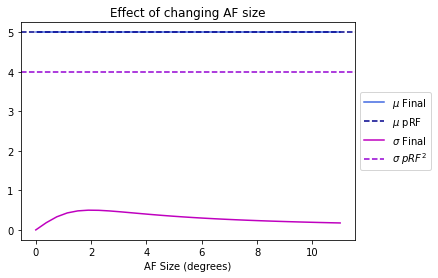

In [45]:
mupRF= 5
sigpRF= 2

muAF= 5
sigAF= np.linspace(0,11,30)

print(f'pRF Centre: {mupRF}, pRF size: {sigpRF}')

RF_final = [(gauss_interaction(mupRF,sigpRF,muAF,i)) for i in sigAF]
m,s = map(list,zip(*RF_final)) # change tuples to lists

fig, ax= plt.subplots()
ax.plot(sigAF,m,c='royalblue', label='$\mu$ Final')
l1=plt.axhline(mupRF,c='darkblue',ls='--',label='$\mu$ pRF')
ax.plot(sigAF,s,c='m', label='$\sigma$ Final')
l2=plt.axhline(sigpRF**2,c='darkviolet',ls='--',label='$\sigma$ $pRF^2$')

ax.set(xlabel='AF Size (degrees)', title='Effect of changing AF size')
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")

plt.show()

Mu_final: 1.7817371937639197, sig_final: 1.746102449888641


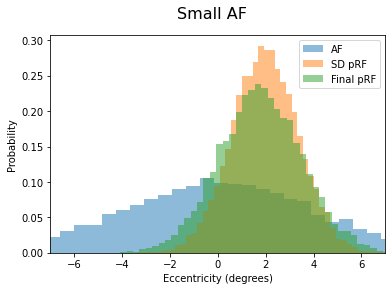

In [55]:
# simulate data

gauss_interaction(*gauss_interaction(2,1.4,0,2),0,2)

# attention field
mupRF= 2
sigpRF= 1.4

muAF= 0
sigAF= 4

AF_dist = np.random.normal(muAF,sigAF,10000)
# AF_dist = AF_dist[(AF_dist>0)&(AF_dist<15)]
pRF_dist = np.random.normal(mupRF,sigpRF,10000)


# multiply gaussians to get a gaussian representing pRF under influence of attention (Klien et al., 2014)
mu_final = ((muAF*sigpRF**2) + (mupRF*sigAF**2))/(sigAF**2+sigpRF**2)
sig_final = (sigAF**2 * sigpRF**2)/(sigAF**2 + sigpRF**2)
final_dist = np.random.normal(mu_final, sig_final, 10000)

# plot simulated gaussians
fig, axs = plt.subplots(figsize=(6,4), sharex=True)
fig.suptitle(f'Small AF', fontsize = 16)
axs.set(xlabel='Eccentricity (degrees)', ylabel='Probability')

axs.hist(AF_dist, density=True, alpha=.5, bins=50, label='AF')
axs.hist(pRF_dist, density=True, alpha=.5, bins=50, label='SD pRF')
axs.hist(final_dist, density=True, alpha=.5, bins=50, label='Final pRF')
axs.set(xlim=(-7,7))
axs.legend()

plt.savefig(f'pics/AF_size_{sigAF}.png', dpi=300)
print(f'Mu_final: {mu_final}, sig_final: {sig_final}')
plt.show()

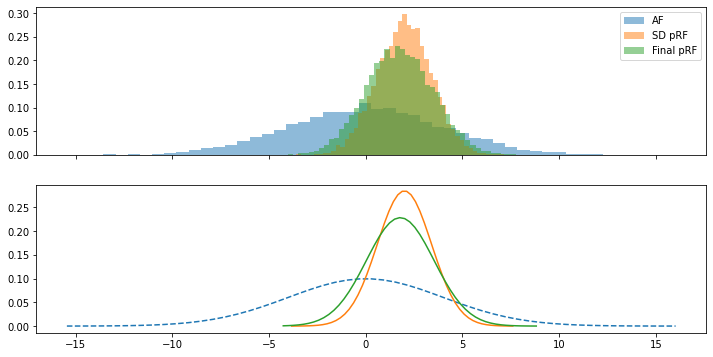

In [54]:
# plot with best fit line

bins = 50

def fit_line(m, s, bins):
    y = ((1 / (np.sqrt(2 * np.pi) * s)) * 
         np.exp(-0.5 * (1 / s * (bins - m))**2))
    return y

# len(bins_pRF)

fig, axs = plt.subplots(2,1,figsize=(12,6), sharex=True)

_, bins_AF,_ = axs[0].hist(AF_dist, density=True, alpha=.5, bins=50, label='AF')
_, bins_pRF,_ = axs[0].hist(pRF_dist, density=True, alpha=.5, bins=50, label='SD pRF')
_, bins_final,_ = axs[0].hist(final_dist, density=True, alpha=.5, bins=50, label='Final pRF')

axs[1].plot(bins_AF,fit_line(muAF,sigAF,bins_AF), '--')
axs[1].plot(bins_pRF,fit_line(mupRF,sigpRF,bins_pRF))
axs[1].plot(bins_final,fit_line(mu_final,sig_final,bins_final))
# axs[1].set(xlim=(-7,7))
# axs[1].set(yticks=None)

axs[0].legend()
plt.show()

In [361]:
# first create new pRF model based on an eccentricity shift
pRF_AD = pRF_model(420,300,30, plot=False)
bold_AD = predict_BOLD(pRF_AD, plot=False)

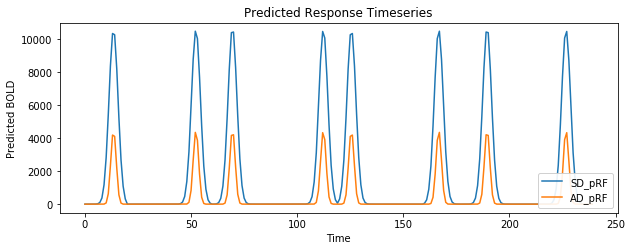

In [362]:
# plot old predicted BOLD (only stimulus driven) and new predicted BOLD (stimulus and attention driven)
plt.figure(figsize=(10,3.5))
plt.title('Predicted Response Timeseries')
plt.xlabel('Time')
plt.ylabel('Predicted BOLD')
plt.plot(bold, label='SD_pRF')
plt.plot(bold_AD, label='AD_pRF')
plt.legend(loc='lower right', framealpha=0.9)
# plt.savefig('Predicted Response Timeseries.png', dpi=300)
plt.show()

Reducing size of pRF reduces predicted bold response? 

**Note:** Attention + pRF models need a suppresive drive (effect of stimulus that is NOT in given pRF).

In [18]:
_,bin_stim = load_data()

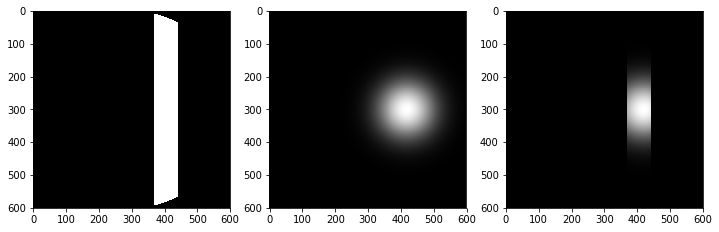

In [31]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(bin_stim[13], cmap='gray')

plt.subplot(132)
plt.imshow(pRF, cmap='gray')

plt.subplot(133)
plt.imshow(bin_stim[13]*pRF, cmap='gray')

# Simulating binning errors in pRF analysis

pRFs are 2D Gaussians defined by their centre (x0,y0) and their size. We're going to simulate some pRFs, only differening in eccentricity to see if we can 

# Create widget for slider

In [2]:
%matplotlib inline

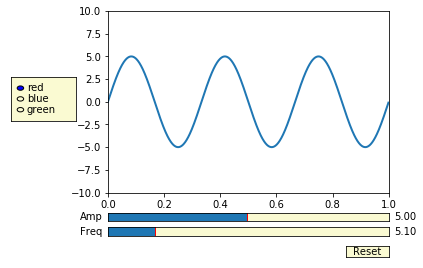

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

## Normalization Model Equations

In [40]:
c = 2 # stimulus contrast
a = 1 # response gain, r approaches alpha!!
c_s = 1 # surrounding stimulus --> suppresive drive
b = 0.5 # scaling factor 0 > 1
s = 1 # contrast gain
g = 10 # peak gain for the attention field 

r = a*c / (c + b*c_s + s/g)
r

0.7692307692307692

In [ ]:
stim_field = np.array([[0,0,0],
                       [0,1,0],
                       [0,1,0]])

supp_drive = np.array([[0,1,0],
                       [0,1,0],
                       [0,1,0]])

att_field = np.array([[1,1,1],
                      [1,1,1],
                      [1,1.2,1]])


plt.figure(figsize=(12,6))

plt.subplot(141)
plt.imshow(stim_field)
plt.title('stim_field')

plt.subplot(142)
plt.imshow(att_field)
plt.title('att_field')

plt.subplot(143)
plt.imshow((stim_field*att_field))
plt.title('interaction')

plt.show()